In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid", palette="coolwarm")


In [4]:
csv_data = """Area,Bedrooms,Bathrooms,Location_Score,Age,House_Price
1200,3,2,8.5,5,185000
1500,4,3,9.0,3,250000
1000,2,1,7.0,15,130000
1800,4,3,8.8,7,275000
2200,5,4,9.5,2,350000
900,2,1,6.5,20,110000
1600,3,2,8.0,10,210000
2000,4,3,9.2,4,300000
950,2,1,6.8,18,120000
1750,3,2,8.3,12,230000
2100,4,3,9.1,3,320000
1300,3,2,7.5,8,170000
1450,3,2,7.9,6,190000
1950,4,3,8.7,5,295000
2300,5,4,9.6,1,360000
800,1,1,6.0,22,95000
1400,3,2,7.8,9,175000
1650,3,2,8.2,11,215000
2400,5,4,9.7,2,380000
1250,3,2,7.3,10,160000
"""

with open("house_prices.csv", "w") as f:
    f.write(csv_data)

print("house_prices.csv has been created successfully!")


house_prices.csv has been created successfully!


In [5]:
import pandas as pd
df = pd.read_csv("house_prices.csv")
df.head()

,Area,Bedrooms,Bathrooms,Location_Score,Age,House_Price
0,1200,3,2,8.5,5,185000
1,1500,4,3,9.0,3,250000
2,1000,2,1,7.0,15,130000
3,1800,4,3,8.8,7,275000
4,2200,5,4,9.5,2,350000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            20 non-null     int64  
 1   Bedrooms        20 non-null     int64  
 2   Bathrooms       20 non-null     int64  
 3   Location_Score  20 non-null     float64
 4   Age             20 non-null     int64  
 5   House_Price     20 non-null     int64  
dtypes: float64(1), int64(5)
memory usage: 1.1 KB


In [7]:
df.describe()

,Area,Bedrooms,Bathrooms,Location_Score,Age,House_Price
count,20.00000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,1575.00000,3.300000,2.350000,8.170000,8.65000,226000.000000
std,483.00049,1.080935,0.988087,1.070219,6.17529,86945.233821
min,800.00000,1.000000,1.000000,6.000000,1.00000,95000.000000
25%,1237.50000,3.000000,2.000000,7.450000,3.75000,167500.000000
50%,1550.00000,3.000000,2.000000,8.250000,7.50000,212500.000000
75%,1962.50000,4.000000,3.000000,9.025000,11.25000,296250.000000
max,2400.00000,5.000000,4.000000,9.700000,22.00000,380000.000000


In [8]:
df.isnull().sum()

Area              0
Bedrooms          0
Bathrooms         0
Location_Score    0
Age               0
House_Price       0
dtype: int64

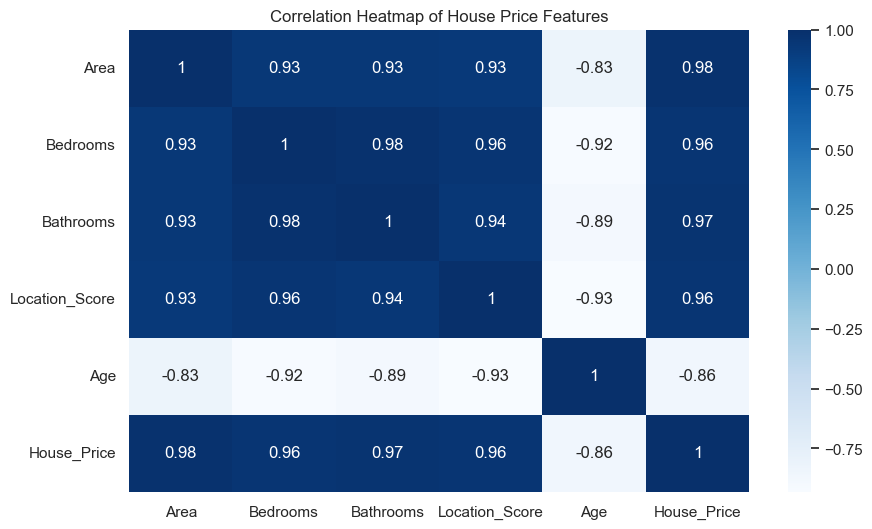

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap of House Price Features")
plt.show()

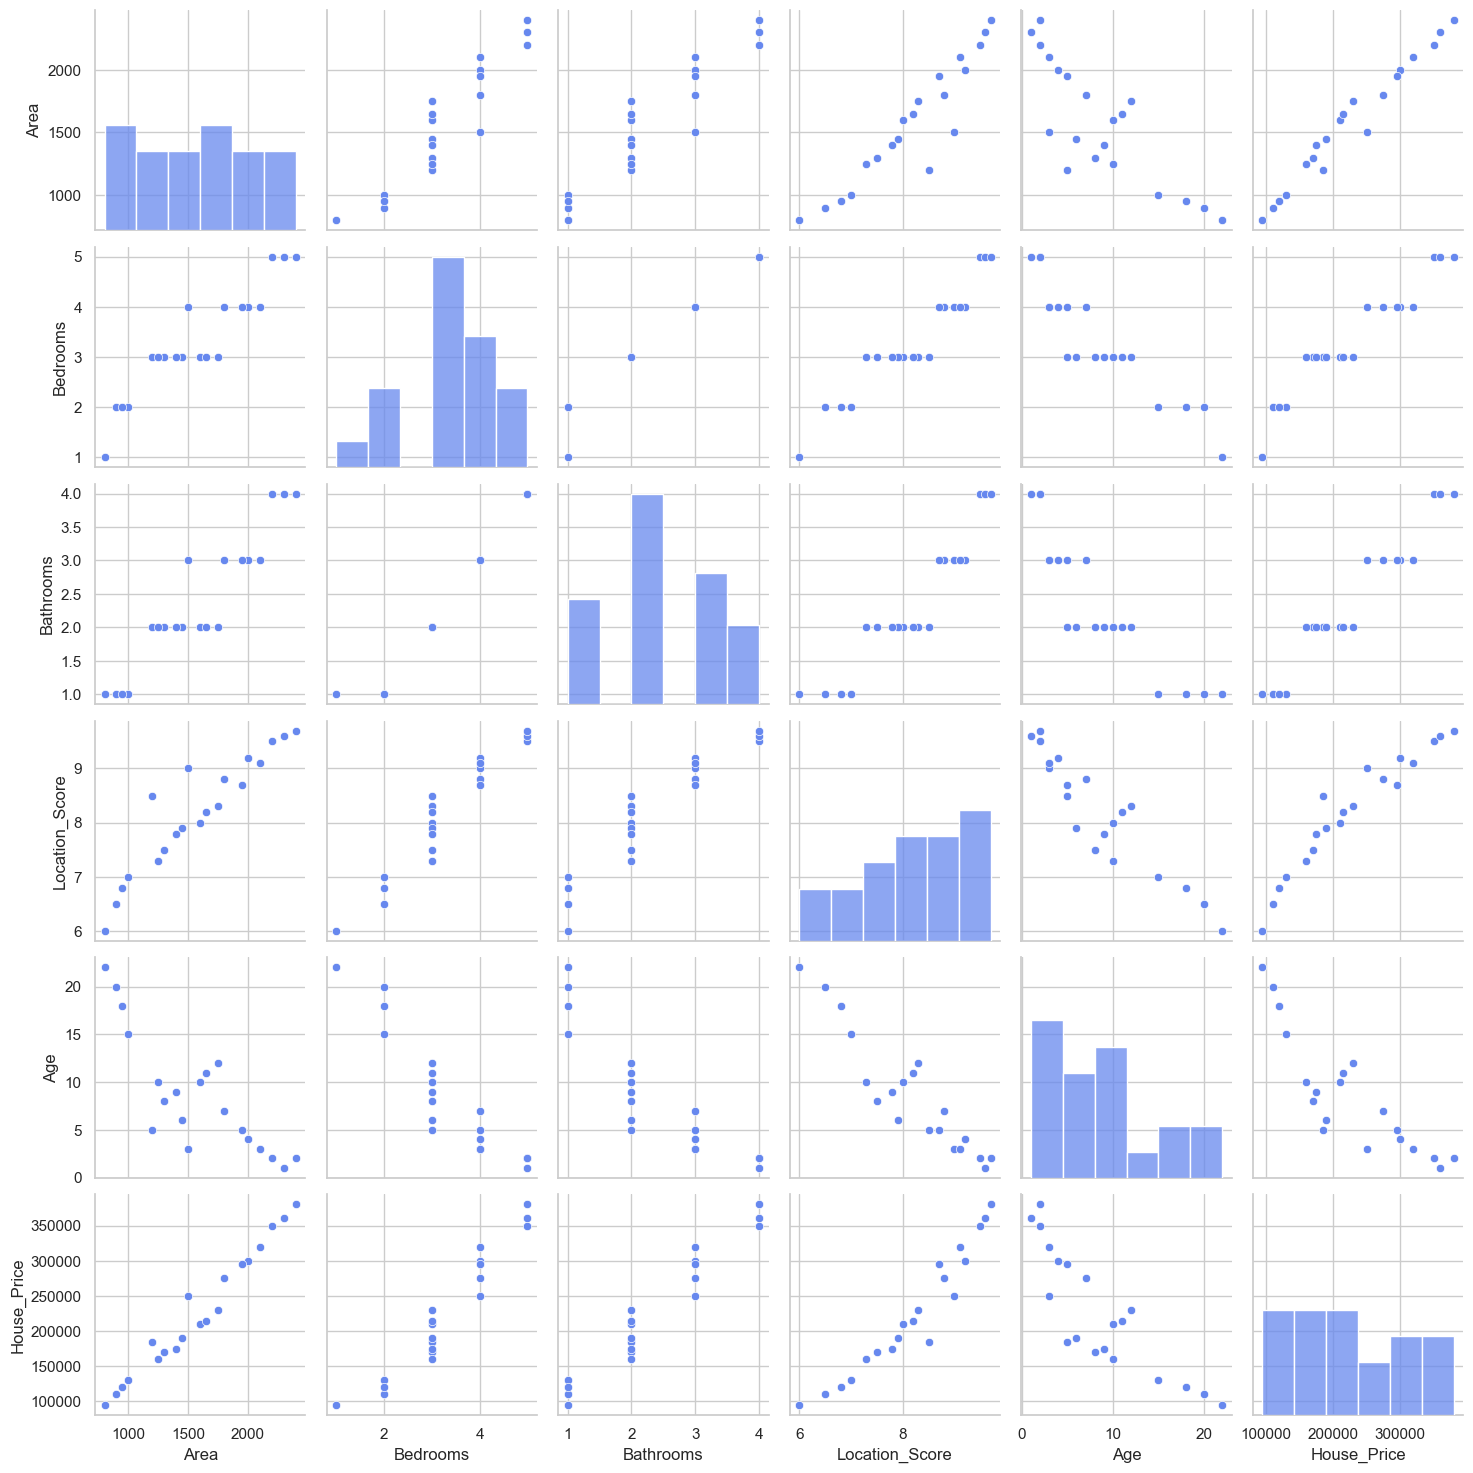

In [10]:
sns.pairplot(df)
plt.show()

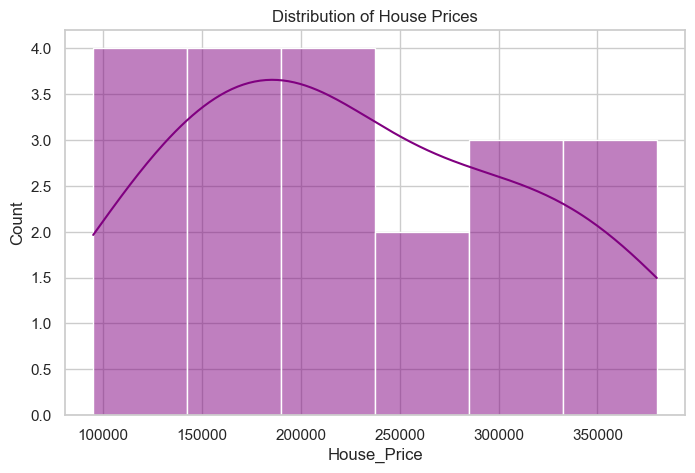

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(df["House_Price"], kde=True, color="purple")
plt.title("Distribution of House Prices")
plt.show()

In [12]:
X = df.drop("House_Price", axis=1)
y = df["House_Price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

In [14]:
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

pred_rf = rf.predict(X_test)

In [15]:
def evaluate_model(name, y_test, y_pred):
    print(f"📌 {name} MODEL")
    print("MAE :", mean_absolute_error(y_test, y_pred))
    print("MSE :", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("R² Score :", r2_score(y_test, y_pred))
    print("-"*50)

In [16]:
evaluate_model("Linear Regression", y_test, pred_lr)
evaluate_model("Random Forest", y_test, pred_rf)

📌 Linear Regression MODEL
MAE : 13045.320920216313
MSE : 187185793.60276157
RMSE: 13681.585931563694
R² Score : 0.943357490351883
--------------------------------------------------
📌 Random Forest MODEL
MAE : 17787.5
MSE : 425729687.5
RMSE: 20633.218059721075
R² Score : 0.8711739952718676
--------------------------------------------------


C:\Users\Asus\AppData\Local\Temp\ipykernel_1892\2170767669.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=scores, palette="Purples")


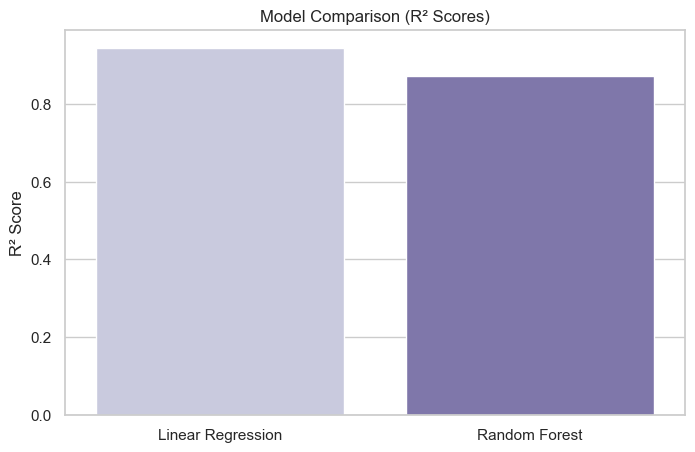

In [17]:
models = ["Linear Regression", "Random Forest"]
scores = [
    r2_score(y_test, pred_lr),
    r2_score(y_test, pred_rf)
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=scores, palette="Purples")
plt.title("Model Comparison (R² Scores)")
plt.ylabel("R² Score")
plt.show()

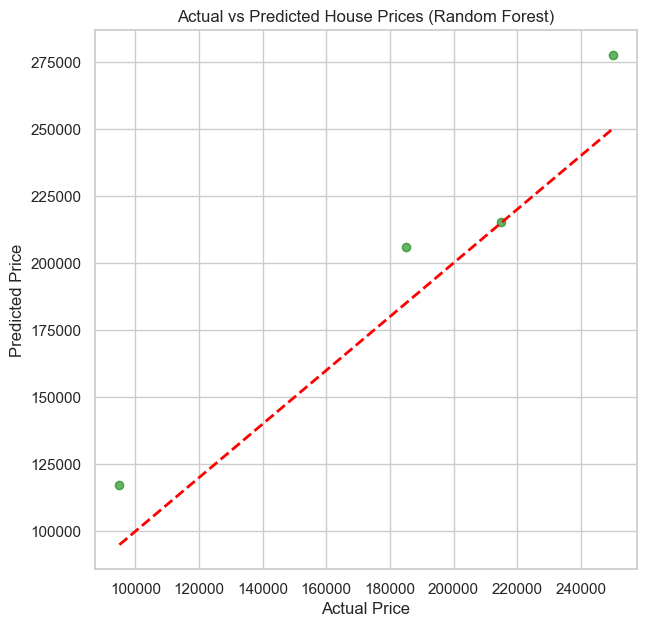

In [18]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, pred_rf, color="green", alpha=0.6)

plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--', linewidth=2)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (Random Forest)")
plt.show()

In [19]:
sample = [[1500, 3, 2, 8.2, 10]]
rf.predict(sample)

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([199425.])